# Numpy

In [1]:
import numpy as np

## Основные типы данных

- ``bool_``  Boolean (True or False) stored as a byte
- ``int_ ``  	Default integer type (same as C long; normally either int64 or int32)
- ``intc``	Identical to C int (normally int32 or int64)
- ``intp``  	Integer used for indexing (same as C ssize_t; normally either int32 or int64)
- ``int8`` 	Byte (-128 to 127)
- ``int16``	Integer (-32768 to 32767)
- ``int32``	Integer (-2147483648 to 2147483647)
- ``int64``	Integer (-9223372036854775808 to 9223372036854775807)
- ``uint8``	Unsigned integer (0 to 255)
- ``uint16``	Unsigned integer (0 to 65535)
- ``uint32``	Unsigned integer (0 to 4294967295)
- ``uint64``	Unsigned integer (0 to 18446744073709551615)
- ``float_``	Shorthand for float64.
- ``float16``	Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
- ``float32``	Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
- ``float64``	Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
- ``complex_``	Shorthand for complex128.
- ``complex64``	Complex number, represented by two 32-bit floats (real and imaginary components)
- ``complex128``	Complex number, represented by two 64-bit floats (real and imaginary components)

In [2]:
np.int(1e18) # обёртка питоновского типа

1000000000000000000

32-битный int в C хранит числа от −2147483648 до 2147483647 на $10^{18}$ не хватит, чтобы хранить

In [3]:
print(np.int32(1e18))

-1486618624


64-битный int в С хранит числа от -9223372036854775808 до 9223372036854775807 на $10^{18}$ уже хватает

In [4]:
print(np.int64(1e18))

1000000000000000000


In [5]:
type(np.sqrt(-1 + 0j))

numpy.complex128

In [6]:
np.sqrt(-1 + 0j)

1j

## Основные численные функции

Арифметические функции из numpy не работают существенно быстрее, чем функции из math, если считаете для одного значения

##### Округления чисел

In [7]:
np.round(4.1), np.floor(4.1), np.ceil(4.1), np.int(4.1)

(4.0, 4.0, 5.0, 4)

In [8]:
np.round(-4.1), np.floor(-4.1), np.ceil(-4.1), np.int(-4.1)

(-4.0, -5.0, -4.0, -4)

##### Арифметические операции

In [9]:
np.log(0.)

/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [10]:
np.log(-1.)

/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

Функции работают и с комплексными числами

In [11]:
(-1 + 4j)*(3-4j)

(13+16j)

In [12]:
np.log(-1 + 0j)

3.141592653589793j

In [13]:
np.log(1j)

1.5707963267948966j

In [14]:
np.abs(1j) # возвращает модуль комплексного числа

1.0

In [15]:
np.abs(1 + 1j)

1.4142135623730951

##### Константы

In [16]:
np.pi, type(np.pi)

(3.141592653589793, float)

In [17]:
np.e, type(np.e)

(2.718281828459045, float)

In [18]:
np.exp(np.pi * 1j)

(-1+1.2246467991473532e-16j)

In [19]:
np.round(np.exp(np.pi * 1j) + 1)

0j

##### Ещё примеры переполнения типов данных

Использование чисел определённой битности накладывает ограничения на их максимальные значения

In [20]:
2 ** 1000 # питоновское умножение

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

In [21]:
np.power(2, 1000), type(np.power(2, 1000))

(0, numpy.int64)

### Однородный многомерный массив

In [22]:
type(np.array([]))

numpy.ndarray

1. ``ndarray.ndim`` - число "оси" массива.
2. ``ndarray.shape`` - размеры массива. Число элементов кортежа shape равно ndim.
3. ``ndarray.size`` - количество элементов массива. 
4. ``ndarray.dtype`` - объект, описывающий тип элементов массива
5. ``ndarray.itemsize`` - размер каждого элемента массива в байтах


In [23]:
arr = np.array([[1, 0], [2, 0], [4, 0], [8, 0], [16, 0], [32, 0]], dtype=np.complex128)

print(arr.ndim)
print(arr.shape)
print(arr.size)
print(arr.dtype)
print(arr.itemsize)
print(arr.data)

2
(6, 2)
12
complex128
16


##### Индексация двухмерных массивов

In [24]:
arr = np.array(
    [
        [1, 0, 4], 
        [2, 0, 4], 
        [4, 0, 4], 
        [8, 0, 4], 
        [16, 0, 4], 
        [32, 0, 4]
    ],
    dtype=np.int64
)

In [25]:
arr[:, 0]

array([ 1,  2,  4,  8, 16, 32])

In [26]:
arr[1::2, 0]

array([ 2,  8, 32])

Первый способ быстрее

In [27]:
%timeit arr[0, 0], arr[1, 0], arr[4, 0], arr[-1, 0]

345 ns ± 9.98 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
%timeit arr[0][0], arr[1][0], arr[4][0], arr[-1][0]

801 ns ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
np.ix_([1, 3, 5], [0, 2])

(array([[1],
        [3],
        [5]]), array([[0, 2]]))

##### Преимущество по скорости

In [30]:
a = list(range(10000))
b = list(range(10000))

In [31]:
%%timeit
c = [ x * y    for x, y in zip(a, b) ]

416 µs ± 9.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
a = np.array(a)
b = np.array(b)

In [33]:
%%timeit
c = a * b

4.36 µs ± 50.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
%%timeit
c = [ x * y for x, y in zip(a, b) ]

1.01 ms ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### random

В numpy есть аналог модуля random - numpy.random. Используя типизацию из C, он как и свой аналог генерирует случайные данные.

In [35]:
np.random.rand(2, 3, 4) # равномерное от 0 до 1 распределение в заданном shape

array([[[4.66404770e-01, 5.95509366e-02, 2.77827674e-01, 1.00896813e-01],
        [2.01184950e-01, 6.17996864e-01, 3.54726135e-01, 8.68792965e-01],
        [9.41327316e-01, 9.33268621e-01, 4.83968406e-01, 8.34586815e-01]],

       [[5.90516903e-01, 3.35967149e-01, 1.25801005e-01, 9.49774868e-01],
        [3.46055171e-01, 4.83584700e-01, 1.92474931e-01, 8.96431253e-01],
        [7.74414130e-04, 7.88824772e-02, 4.66132895e-01, 8.60947702e-01]]])

In [36]:
np.random.bytes(10) # случайные байты

b'F\xd5\xd5\xc1\xc9y,df['

#### Ещё один пример эффективных вычислений

В математике определена операция перемножения матриц (двухмерных массивов)

$A \times B = C$

$C_{ij} = \sum_k A_{ik} B_{kj}$

In [37]:
A = np.random.randint(1000, size=(200, 100))
B = np.random.randint(1000, size=(100, 300))

In [38]:
def np_multiply():
    return np.dot(A, B)

In [39]:
%timeit np_multiply()

4.08 ms ± 71.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


если хранить матрицу не как двухмерный массив, а как список списков, то будет дольше работать

In [40]:
A = [list(x) for x in A]
B = [list(x) for x in B]

In [41]:
%timeit np_multiply()

7.95 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


а это умножение на чистом питоновском коде

In [42]:
def python_multiply():
    res = []
    for i in range(200):
        row = []
        for j in range(300):
            val = 0
            for k in range(100):
                val += A[i][k] * B[k][j]
            row.append(val)
        res.append(row)
    return res

In [43]:
%timeit python_multiply()

1.01 s ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Ускорение более чем в 100 раз

### Задача 1

Дан массив $arr$, требуется для каждой позиции $i$ найти номер элемента $arr_i$ в массиве $arr$, отсортированном по убыванию. Все значения массива $arr$ различны.

In [7]:
def function_1(arr):
    sortarr = sorted(arr, key=lambda x: int(x), reverse = True)
    return np.array([sortarr.index(i) for i in arr])   

In [13]:
def function_1(arr):
    array = list(zip(range(len(arr)),arr))
    arr = np.array([row[0] for row in sorted(array, key=lambda x: int(x[1]), reverse = True) ])
    array = list(zip(range(len(arr)),arr))
    return np.array([row[0] for row in sorted(array, key=lambda x: int(x[1])) ])

In [14]:
arr = [-2, 1, 0, -7,-5,-9,56]
function_1(arr)

array([3, 1, 2, 5, 4, 6, 0])

In [15]:
(function_1([1, 2, 3]) == [2, 1, 0]).all()

True

In [16]:
(function_1([-2, 1, 0]) == [2, 0, 1]).all()

True

In [17]:
(function_1([-2, 1, 0, -1]) == [3, 0, 1, 2]).all()

True

**Значение для формы**

In [18]:
np.random.seed(42)
arr = function_1(np.random.uniform(size=1000000))
print(arr[7] + arr[42] + arr[445677] + arr[53422])

499148


### Задача 2

Дана матрица $X$, нужно найти след матрицы $X X^T$

In [51]:
def function_2(matrix):
    xt=np.matrix.transpose(matrix)
    return np.matrix.trace(np.matmul(matrix,xt))

In [52]:
function_2(np.array([
    [1, 2],
    [3, 4]
])) == 30

True

In [53]:
function_2(np.array([
    [1, 0],
    [0, 1]
])) == 2

True

In [54]:
function_2(np.array([
    [2, 0],
    [0, 2]
])) == 8

True

In [55]:
function_2(np.array([
    [2, 1, 1],
    [1, 2, 1]
])) == 12

True

**Значение для формы**

In [56]:
np.random.seed(42)
arr1 = np.random.uniform(size=(1, 100000))
arr2 = np.random.uniform(size=(100000, 1))
arr2=np.matrix.transpose(arr2)
print(int(function_2(arr1) + function_2(arr2)))   

66730


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 3

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [58]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def fit(self, points_x, points_y):
        
        self.coefs = np.polyfit(points_x, points_y, self.max_degree)

        return self
    
    def predict(self, points_x):
        
        values = [np.polyval(self.coefs, points_x[j]) for j in range(len(points_x))]
        
        return values

In [59]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x]) # we use list comprehesion but think about how to write it using np.array operations

In [60]:
PolynomialRegression(7).fit(points_x, points_y)

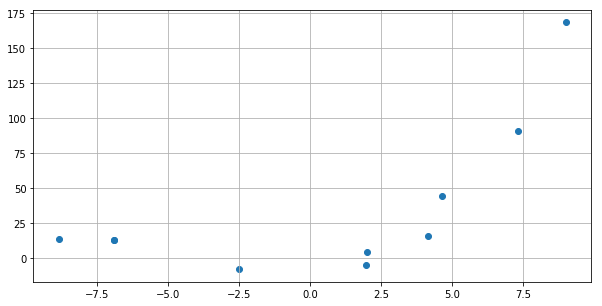

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [62]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

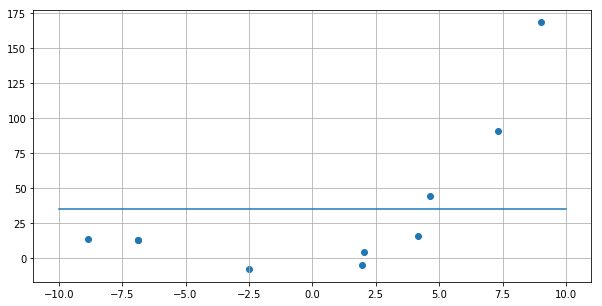

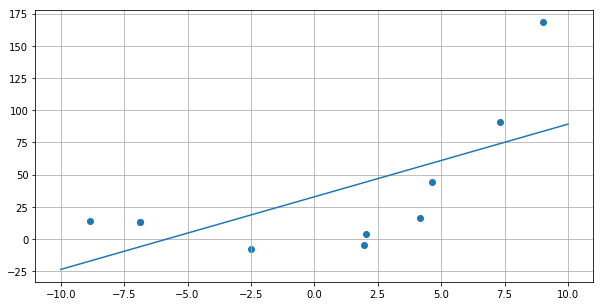

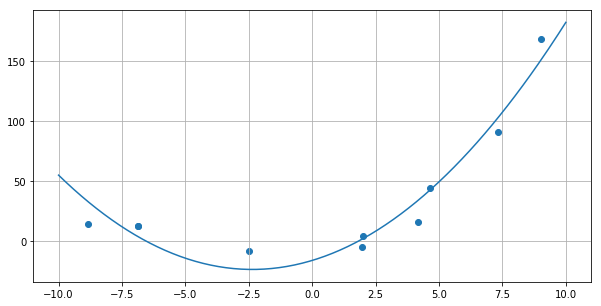

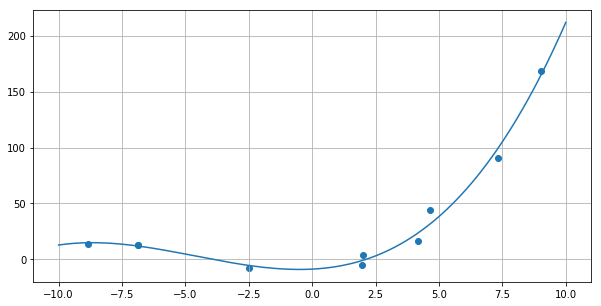

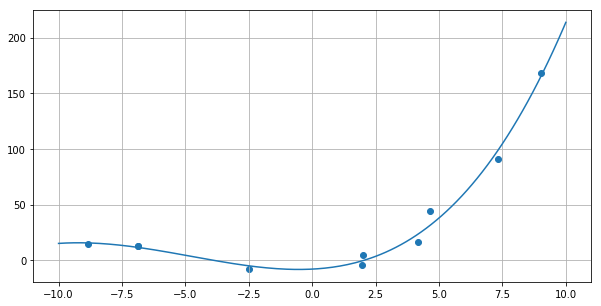

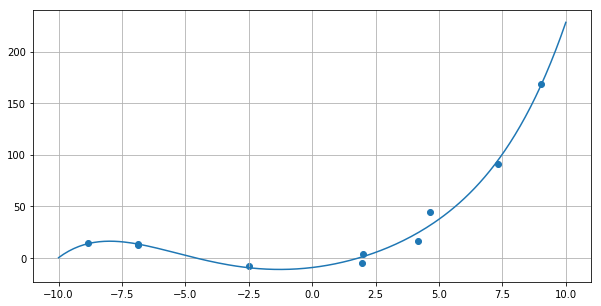

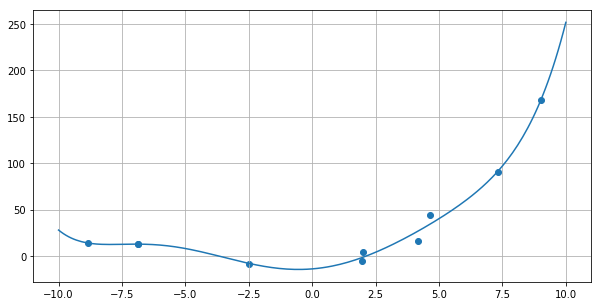

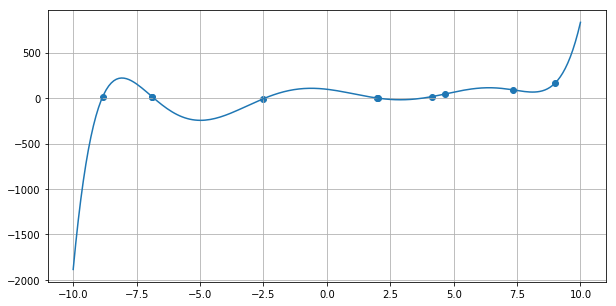

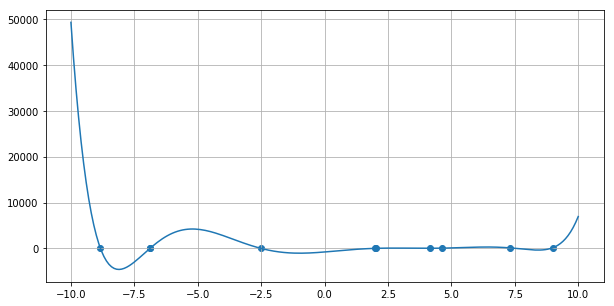

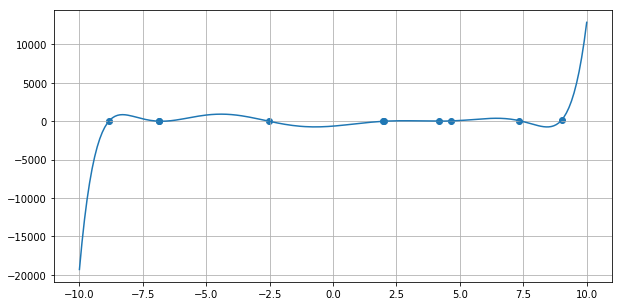

In [63]:
for i in range(10):
    plot_model(i)

**Значение для формы**

In [64]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

811
